<a href="https://colab.research.google.com/github/SandhyaKshirsagar/ML-Practice-Projects/blob/main/mental_health_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The data is sourced from diverse platforms including social media posts, Reddit posts, Twitter posts, and more. Each entry is tagged with a specific mental health status, making it an invaluable asset for:

* Developing intelligent mental health chatbots.
* Performing in-depth sentiment analysis.
* Research and studies related to mental health trends.

Features:
* unique_id: A unique identifier for each entry.
* Statement: The textual data or post.
* Mental Health Status: The tagged mental health status of the statement.


Dataset path: /content/drive/MyDrive/Colab Notebooks/ML/Mental health sentiment analysis/Combined Data.csv

In [1]:
#importing libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# Importing the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/Mental health sentiment analysis/Combined Data.csv')
df.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [3]:
df.shape

(53043, 3)

In [4]:
df.statement[1]

'trouble sleeping, confused mind, restless heart. All out of tune'

In [5]:
df.columns

Index(['Unnamed: 0', 'statement', 'status'], dtype='object')

In [6]:
df.isnull().sum()

,0
Unnamed: 0,0
statement,362
status,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53043 non-null  int64 
 1   statement   52681 non-null  object
 2   status      53043 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [8]:
df[df.statement.isnull()]

,Unnamed: 0,statement,status
293,293,NaN,Anxiety
572,572,NaN,Anxiety
595,595,NaN,Anxiety
1539,1539,NaN,Normal
2448,2448,NaN,Normal
...,...,...,...
52838,52838,NaN,Anxiety
52870,52870,NaN,Anxiety
52936,52936,NaN,Anxiety
53010,53010,NaN,Anxiety


In [9]:
# dropping the null values from the statement column.
df = df.dropna()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52681 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  52681 non-null  int64 
 1   statement   52681 non-null  object
 2   status      52681 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.6+ MB


In [11]:
df.isnull().sum()

,0
Unnamed: 0,0
statement,0
status,0


In [12]:
df.nunique()

,0
Unnamed: 0,52681
statement,51073
status,7


In [13]:
df['status'].unique()

array(['Anxiety', 'Normal', 'Depression', 'Suicidal', 'Stress', 'Bipolar',
       'Personality disorder'], dtype=object)

In [14]:
df['status'].value_counts()

,count
status,
Normal,16343
Depression,15404
Suicidal,10652
Anxiety,3841
Bipolar,2777
Stress,2587
Personality disorder,1077


Its a multiclass classification with imbalanced data

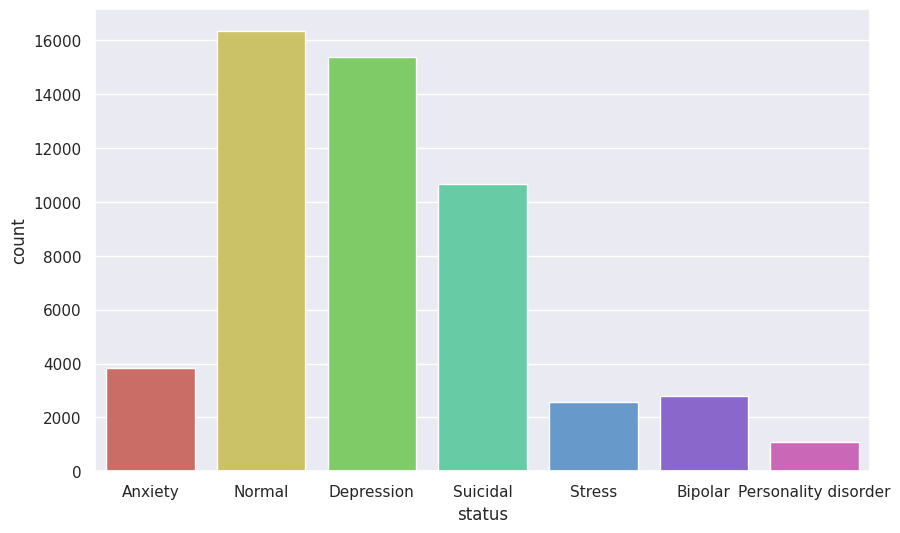

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(x='status',data=df, palette = 'hls')
plt.show()

EDA

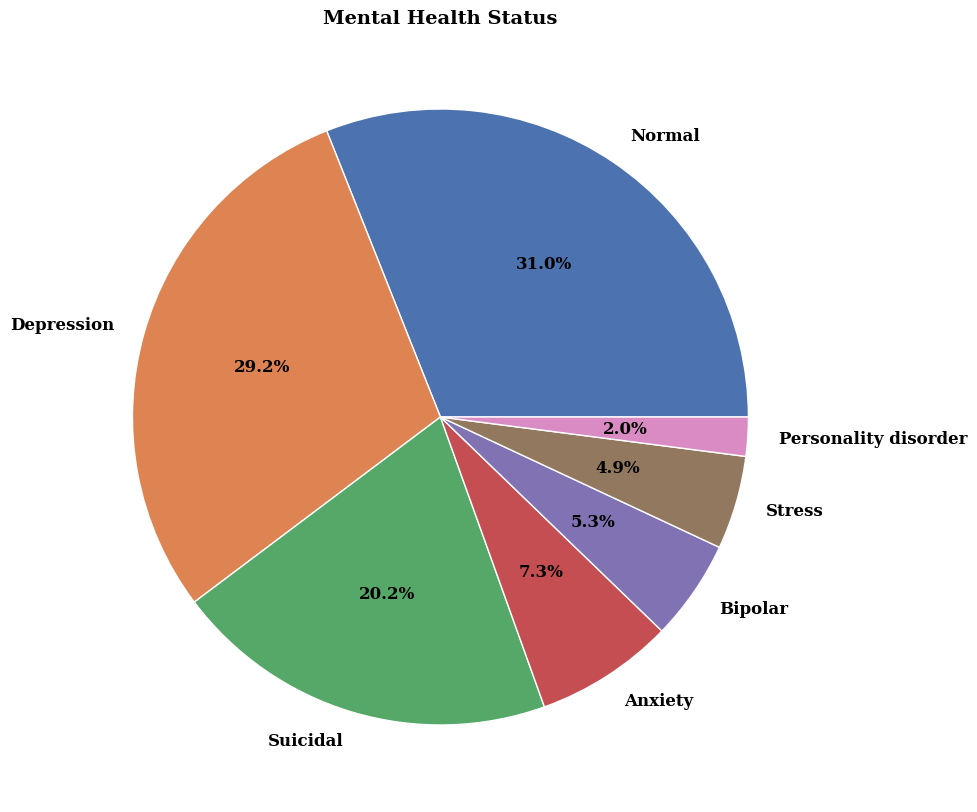

In [16]:
plt.figure(figsize=(15,10))
plt.pie(df['status'].value_counts(), labels=df['status'].value_counts().index, autopct='%1.1f%%',
       textprops={'fontsize':12, 'color':'black','weight':'bold', 'family':'serif'})
hfont = {'fontname':'serif', 'color':'black', 'weight':'bold', 'size':'14'}
plt.title('Mental Health Status', fontdict=hfont)
plt.show()

In [17]:
df.statement[10]

"always restless every night, even though I don't know why, what's wrong. strange."

Steps in converting the text data into numeric.

In [18]:
review_0 = df['statement'].values[0]
print(review_0)
print("************"*10)
review_5000 = df['statement'].values[5000]
print(review_5000)
print("************"*10)
review_15000 = df['statement'].values[15000]
print(review_15000)

oh my gosh
************************************************************************************************************************
before the hot sauce mv comes outðŸŒ¶, let's be mutual first so we can slip togetherðŸ¤© esp nctzen wayzenni, if it's through rt/like, thankssâ
************************************************************************************************************************
I moved out of state away from all my friends a year ago and I still have no friends. I am in summer school but do not have time because of work. I work 8-12 hours pretty much 6 days a week. My parents are constantly hounding me to do school. I have dreams and hopes that one day I can have a family but I just do not see that happening. Maybe my judgement is clouded but I really do not see it happening. I do not feel comfortable sharing with my parents or anyone. I used to see a counselor and she said that it was likely that I had depression, OCD, and Anxiety. Literally one of my biggest dreams in

In [19]:
df_new = df.copy()

In [20]:
df_new

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety
...,...,...,...
53038,53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety
53039,53039,"selfishness ""I don't feel very good, it's lik...",Anxiety
53040,53040,Is there any way to sleep better? I can't slee...,Anxiety
53041,53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety


1. Converting all the text to lowercase

In [21]:
def clean_text(text):
  text = text.lower()
  return text.strip()

In [22]:
df_new['statement'] = df_new['statement'].apply(lambda x:clean_text(x))

In [23]:
df_new

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"all wrong, back off dear, forward doubt. stay ...",Anxiety
3,3,i've shifted my focus to something else but i'...,Anxiety
4,4,"i'm restless and restless, it's been a month n...",Anxiety
...,...,...,...
53038,53038,nobody takes me seriously i’ve (24m) dealt wit...,Anxiety
53039,53039,"selfishness ""i don't feel very good, it's lik...",Anxiety
53040,53040,is there any way to sleep better? i can't slee...,Anxiety
53041,53041,"public speaking tips? hi, all. i have to give ...",Anxiety


2. Removing the punctuation marks

In [24]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [25]:
def remove_punctuation(text):
  punctuation_free = "".join([i for i in text if i not in string.punctuation])# Consider the text with no punctuations
  return punctuation_free

In [26]:
df_new['statement'] = df_new['statement'].apply(lambda x:remove_punctuation(x))

In [27]:
df_new

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,trouble sleeping confused mind restless heart ...,Anxiety
2,2,all wrong back off dear forward doubt stay in ...,Anxiety
3,3,ive shifted my focus to something else but im ...,Anxiety
4,4,im restless and restless its been a month now ...,Anxiety
...,...,...,...
53038,53038,nobody takes me seriously i’ve 24m dealt with ...,Anxiety
53039,53039,selfishness i dont feel very good its like i ...,Anxiety
53040,53040,is there any way to sleep better i cant sleep ...,Anxiety
53041,53041,public speaking tips hi all i have to give a p...,Anxiety


In [28]:
import re

In [29]:
# Tokenizing the text.
def tokenization(text):
  tokens = re.split('W+', text)
  return tokens

In [30]:
#df_new['statement'] = df_new['statement'].apply(lambda x:tokenization(x))

In [31]:
df_new

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,trouble sleeping confused mind restless heart ...,Anxiety
2,2,all wrong back off dear forward doubt stay in ...,Anxiety
3,3,ive shifted my focus to something else but im ...,Anxiety
4,4,im restless and restless its been a month now ...,Anxiety
...,...,...,...
53038,53038,nobody takes me seriously i’ve 24m dealt with ...,Anxiety
53039,53039,selfishness i dont feel very good its like i ...,Anxiety
53040,53040,is there any way to sleep better i cant sleep ...,Anxiety
53041,53041,public speaking tips hi all i have to give a p...,Anxiety


3. Using NLTK to remove stopwords

In [32]:
import nltk
from wordcloud import WordCloud

In [33]:
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

NLTK terminology:
1. Documents : data from the single row
2. Corpus: Consolidataed data from all the documents
3. Vocab : unique words
4. words: words from each data value

In [34]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [35]:
def remove_stopwords(text):
  output = " ".join(word for word in text.split() if word.lower() not in stopwords)
  # add space in place of stopwords that are removed.
  return output


In [36]:
df_new['statement'] = df_new['statement'].apply(lambda x:remove_stopwords(x))

In [37]:
df_new

,Unnamed: 0,statement,status
0,0,oh gosh,Anxiety
1,1,trouble sleeping confused mind restless heart ...,Anxiety
2,2,wrong back dear forward doubt stay restless re...,Anxiety
3,3,ive shifted focus something else im still worried,Anxiety
4,4,im restless restless month boy mean,Anxiety
...,...,...,...
53038,53038,nobody takes seriously i’ve 24m dealt depressi...,Anxiety
53039,53039,selfishness dont feel good like dont belong wo...,Anxiety
53040,53040,way sleep better cant sleep nights meds didnt ...,Anxiety
53041,53041,public speaking tips hi give presentation work...,Anxiety


Lemmatisation

In [38]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [39]:
from nltk.stem import WordNetLemmatizer

In [40]:
wordnet_lemmatizer = WordNetLemmatizer()

In [41]:
def lemmatizer(text):
  lemm_text = " ".join([wordnet_lemmatizer.lemmatize(word) for word in text.split()])
  return lemm_text

In [42]:
df_new['statement'] = df_new['statement'].apply(lambda x:lemmatizer(x))

In [43]:
df_new

,Unnamed: 0,statement,status
0,0,oh gosh,Anxiety
1,1,trouble sleeping confused mind restless heart ...,Anxiety
2,2,wrong back dear forward doubt stay restless re...,Anxiety
3,3,ive shifted focus something else im still worried,Anxiety
4,4,im restless restless month boy mean,Anxiety
...,...,...,...
53038,53038,nobody take seriously i’ve 24m dealt depressio...,Anxiety
53039,53039,selfishness dont feel good like dont belong wo...,Anxiety
53040,53040,way sleep better cant sleep night med didnt help,Anxiety
53041,53041,public speaking tip hi give presentation work ...,Anxiety


In [44]:
def remove_digits(text):
  clean_text = re.sub('[^a-z]+',' ',text)
  return clean_text

In [45]:
df_new['statement'] = df_new['statement'].apply(lambda x:remove_digits(x))

In [46]:
df_new

,Unnamed: 0,statement,status
0,0,oh gosh,Anxiety
1,1,trouble sleeping confused mind restless heart ...,Anxiety
2,2,wrong back dear forward doubt stay restless re...,Anxiety
3,3,ive shifted focus something else im still worried,Anxiety
4,4,im restless restless month boy mean,Anxiety
...,...,...,...
53038,53038,nobody take seriously i ve m dealt depressiona...,Anxiety
53039,53039,selfishness dont feel good like dont belong wo...,Anxiety
53040,53040,way sleep better cant sleep night med didnt help,Anxiety
53041,53041,public speaking tip hi give presentation work ...,Anxiety


In [47]:
df1 = df_new[['status','statement']]
df1.head()

,status,statement
0,Anxiety,oh gosh
1,Anxiety,trouble sleeping confused mind restless heart ...
2,Anxiety,wrong back dear forward doubt stay restless re...
3,Anxiety,ive shifted focus something else im still worried
4,Anxiety,im restless restless month boy mean


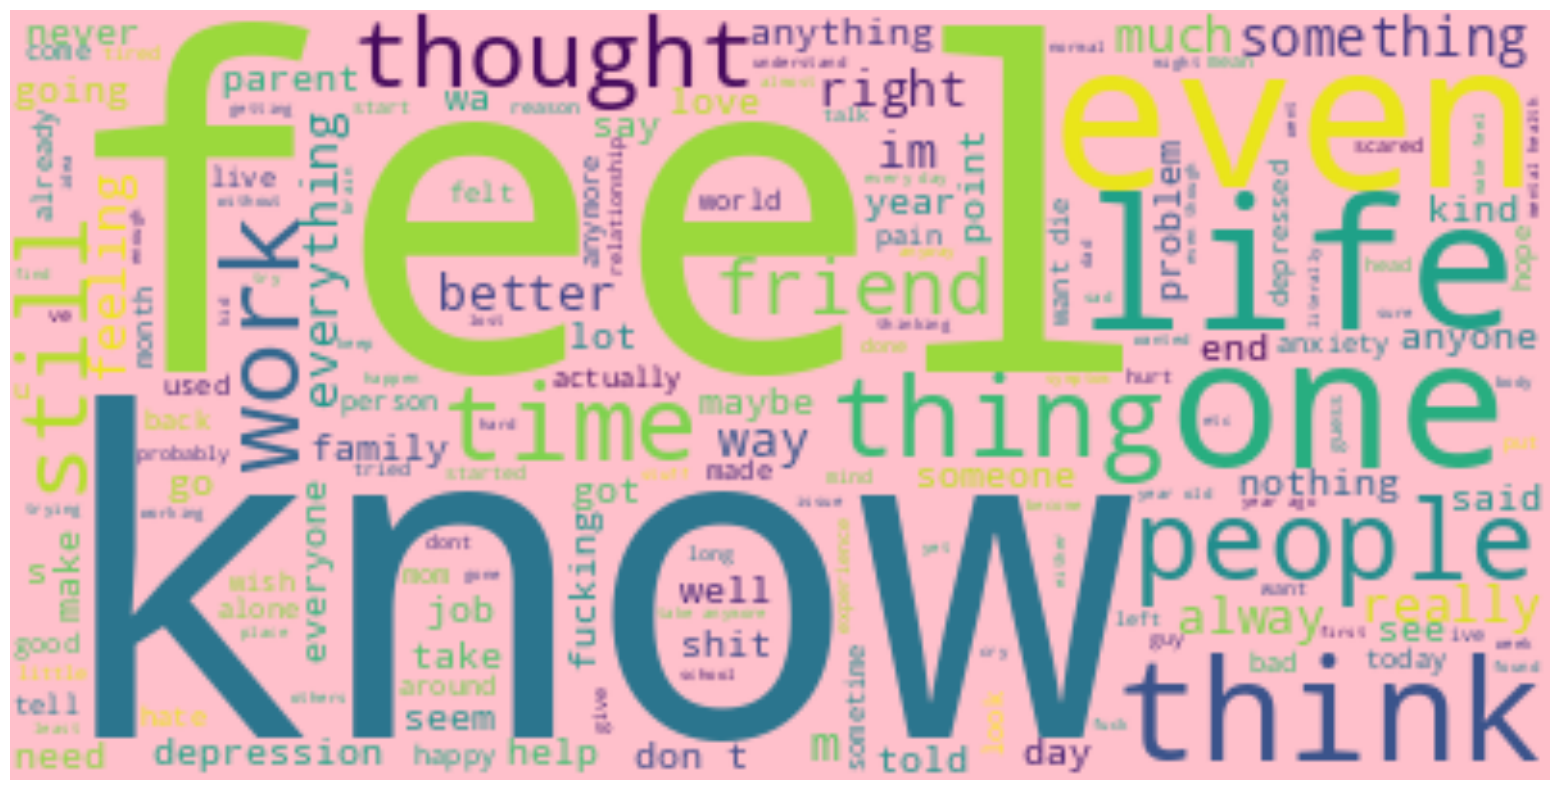

In [48]:
text_data = ' '.join(df1['statement'])
wordcloud = WordCloud(background_color = 'pink').generate(text_data)
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')
plt.show()

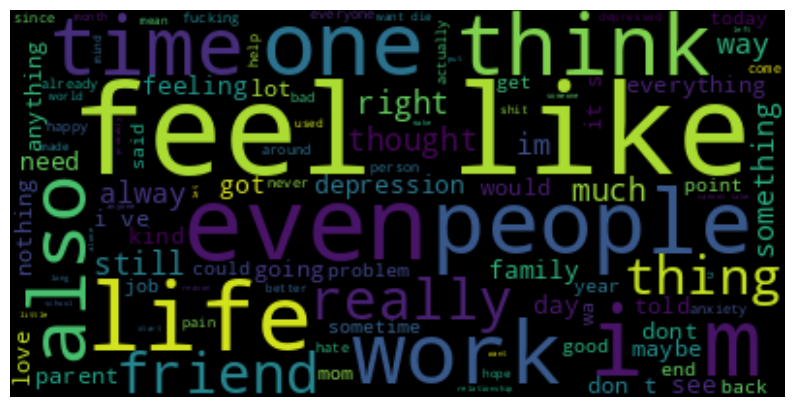

In [49]:
wcloud = WordCloud(max_words=100, stopwords=['go','say','know','well']).generate(text_data)

plt.figure(figsize=(10,10))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [50]:
df1.head()

,status,statement
0,Anxiety,oh gosh
1,Anxiety,trouble sleeping confused mind restless heart ...
2,Anxiety,wrong back dear forward doubt stay restless re...
3,Anxiety,ive shifted focus something else im still worried
4,Anxiety,im restless restless month boy mean


In [51]:
len(df1)

52681

Steps to handle unstructured (text data)

Feature engineering techniques for NLP: Bag of words, Tf-IDF, N-gram, for deep learning Word2vec, Glove.
These techniques convert text to numbers

In [52]:
!pip install contractions

In [53]:
from tqdm import tqdm # it shows the progress bar when applying the below data cleaning rules.
import contractions # split the english contractions such as I'm, you're, into seperate words.
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
import re
import nltk
wordnet = WordNetLemmatizer()
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


One step process for data cleaning.

In [54]:
preprocessed_reviews = []
for sentence in tqdm(df1['statement'].values):
  sentence = contractions.fix(sentence)
  sentence = BeautifulSoup(sentence, 'lxml').get_text()
  sentence = re.sub(r"https\S+","",sentence)
  sentence = re.sub("\S*\d\S*","",sentence).strip()
  sentence = re.sub('[^a-zA-Z\s]+'," ", sentence)
  tokens = sentence.split()
  tokens = [wordnet.lemmatize(word) for word in tokens if word.lower() not in stopwords]
  cleaned_sentence = ' '.join(tokens).lower()
  preprocessed_reviews .append(cleaned_sentence.strip())

100%|██████████| 52681/52681 [00:41<00:00, 1260.32it/s]


In [55]:
preprocessed_reviews

['oh gosh',
 'trouble sleeping confused mind restless heart tune',
 'wrong back dear forward doubt stay restless restless place',
 'shifted focus something else still worried',
 'restless restless month boy mean',
 'every break must nervous like something wrong heck',
 'feel scared anxious may family protected',
 'ever felt nervous know',
 'slept well day like restless huh',
 'really worried want cry',
 'always restless every night even though know wrong strange',
 'confused feeling good lately every time want sleep always feel restless',
 'sometimes needed problem laugh forget problem remember feel restless like well turn still sad burden blah blah blah',
 'worry',
 'sometimes thought make anxious afraid close eye sleep',
 'every time wake definitely nervous excited going try',
 'hope even though worried start like',
 'restive restless restless',
 'regret grudgesangry thing passed worrying much future true serenity',
 'guy sick girl actually feel sick indirectly must feeling restless 

Feature engineering / extraction steps: convert text to vector.
Using TF-IDF

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer

In [57]:
tf_idf_vect = TfidfVectorizer()
tf_idf_vect.fit(preprocessed_reviews)
print('feature names: ', tf_idf_vect.get_feature_names_out()[5000:5050])
final_counts_tfidf = tf_idf_vect.transform(preprocessed_reviews)
print("count vectorizer: ", type(final_counts_tfidf))
print("Shape of the features: ",final_counts_tfidf.shape)

feature names:  ['az' 'azerbaijan' 'azhdaha' 'azimio' 'aziththromycin' 'azizul' 'azo'
 'azporjuos' 'azppa' 'azraeel' 'aztec' 'azz' 'ba' 'baaaad' 'baaad' 'baad'
 'baadd' 'baat' 'baba' 'babadook' 'babai' 'babana' 'babar' 'babaturan'
 'babble' 'babbling' 'babdhlamini' 'babe' 'babget' 'babied' 'babiesand'
 'babitabandhu' 'babs' 'babu' 'baby' 'babyahhhh' 'babybazooka'
 'babycarebot' 'babycenter' 'babydestiny' 'babyi' 'babying' 'babynext'
 'babyporridge' 'babypunch' 'babysat' 'babysit' 'babysitter' 'babysitting'
 'babysleepingwork']
count vectorizer:  <class 'scipy.sparse._csr.csr_matrix'>
Shape of the features:  (52681, 69569)


In [58]:
final_counts_tfidf = tf_idf_vect.fit_transform(preprocessed_reviews).toarray()

In [59]:
pd.DataFrame(final_counts_tfidf).head()

,0,1,2,3,4,5,6,7,8,9,...,69559,69560,69561,69562,69563,69564,69565,69566,69567,69568
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


There are 69569 features. we can take the max 1000 features

In [60]:
df1.head()

,status,statement
0,Anxiety,oh gosh
1,Anxiety,trouble sleeping confused mind restless heart ...
2,Anxiety,wrong back dear forward doubt stay restless re...
3,Anxiety,ive shifted focus something else im still worried
4,Anxiety,im restless restless month boy mean


As there are 69569 features. Trying it with less features, around 2000

In [61]:
tf_idf_vect = TfidfVectorizer(max_features=2000)
tf_idf_vect.fit(preprocessed_reviews)
print('feature names: ', tf_idf_vect.get_feature_names_out()[5000:5050])
final_counts_tfidf = tf_idf_vect.transform(preprocessed_reviews)
print("count vectorizer: ", type(final_counts_tfidf))
print("Shape of the features: ",final_counts_tfidf.shape)

feature names:  []
count vectorizer:  <class 'scipy.sparse._csr.csr_matrix'>
Shape of the features:  (52681, 2000)


In [62]:
final_counts_tfidf = tf_idf_vect.fit_transform(preprocessed_reviews).toarray()

In [63]:
pd.DataFrame(final_counts_tfidf).head()

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
y = df1['status']
x = final_counts_tfidf

In [65]:
y.value_counts()

,count
status,
Normal,16343
Depression,15404
Suicidal,10652
Anxiety,3841
Bipolar,2777
Stress,2587
Personality disorder,1077


In [66]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_le = le.fit_transform(y)
y_le

array([0, 0, 0, ..., 0, 0, 0])

data is imbalanced so we user stratify

In [67]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y_le, test_size=0.2, random_state=42, stratify=y)

In [68]:
from xgboost import XGBClassifier
xgboost = XGBClassifier()
xgboost.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [69]:
y_predict_train = xgboost.predict(x_train)
y_predict_test = xgboost.predict(x_test)

In [70]:
from sklearn.metrics import accuracy_score, classification_report

In [71]:
print("Training Accuracy: ", accuracy_score(y_train, y_predict_train))
print("*****************"*10)
print("Testing Accuracy: ", accuracy_score(y_test, y_predict_test))

Training Accuracy:  0.8619969627942293
**************************************************************************************************************************************************************************
Testing Accuracy:  0.7445193128974091


In [72]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [73]:
rf_pred_train = rf.predict(x_train)
rf_pred_test = rf.predict(x_test)

In [74]:
print("Training Accuracy: ", accuracy_score(y_train, rf_pred_train))
print("*****************"*10)
print("Testing Accuracy: ", accuracy_score(y_test, rf_pred_test))

Training Accuracy:  0.9972238041002278
**************************************************************************************************************************************************************************
Testing Accuracy:  0.7048495776786562


In [75]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [76]:
dt_pred_train = dt.predict(x_train)
dt_pred_test = dt.predict(x_test)

In [77]:
print("Training Accuracy: ", accuracy_score(y_train, dt_pred_train))
print("*****************"*10)
print("Testing Accuracy: ", accuracy_score(y_test, dt_pred_test))

Training Accuracy:  0.9972238041002278
**************************************************************************************************************************************************************************
Testing Accuracy:  0.6352851855366802


Trying the pipeline to run multiple models with hyper parameter tuning.

In [78]:
from sklearn.base import BaseEstimator, ClassifierMixin

class ClfSwitcher(BaseEstimator, ClassifierMixin):

  def __init__(self, estimator = XGBClassifier()):
      """
      A Custom BaseEstimator that can switch between classifiers.
      :param estimator: sklearn object - The classifier
      """

      self.estimator = estimator


  def fit(self, X, y, **kwargs):
      self.estimator.fit(X, y)
      return self


  def predict(self, X, y):
      return self.estimator.predict(X)


  def predict_proba(self, X):
      return self.estimator.predict_proba(X)


  def score(self, X, y):
      return self.estimator.score(X, y)

In [79]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
pipeline = Pipeline([
    #('tfidf', TfidfVectorizer(max_features=1000)),
    ('clf', ClfSwitcher())
])

parameters = [
    {
        'clf__estimator': [MultinomialNB()],
        'clf__estimator__alpha': [0.001, 0.1, 1, 10, 100]
    },

    {
        'clf': [SVC()],
        'clf__C': [0.001, 0.1, 1, 10, 100, 10e5],
        'clf__kernel': ['linear', 'rbf'],
        'clf__class_weight': ['balanced'],
        'clf__probability': [True]
    },

    {
         'clf': [DecisionTreeClassifier()],
         'clf__criterion': ['gini','entropy'],
         'clf__splitter': ['best','random'],
         'clf__class_weight':['balanced', None]
    }
]

gscv = GridSearchCV(pipeline, parameters, cv=5, n_jobs=5, return_train_score=True,)
gscv.fit(x_train, y_train)

The output of the pipline is not shown as the server keeps crashing.